In [1]:
import pandas as pd
from collections import Counter

In [2]:
#전처리된 리뷰데이터Json파일 데이터프레임으로 불러오기
review_data = pd.read_json('preprocessed_review_data.json')

In [31]:
prod_data = pd.read_json('preprocessed_prod_data.json')

In [32]:
prod_data

,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
0,2865723582,http://th4.tmon.kr/thumbs/image/f32/0e0/a5e/b5...,[컬러푸드] 선착순20%할인쿠폰+해남 후기갑 꿀고구마 중상1kg 정품\n한입/특상/...,"[식품·건강, 채소, 감자·고구마·당근·뿌리채소, 고구마]",6900,1,4.4,http://www.tmon.co.kr/deal/2865723582\n,106276
1,512851998,http://th1.tmon.kr/thumbs/image/c8d/da8/a8e/99...,[샐러드미인] 간편한 샐러드/베이글 외 33종,"[식품·건강, 채소, 상추·깻잎·쌈채소·샐러드, 샐러드]",900,1,4.5,http://www.tmon.co.kr/deal/512851998\n,61337
2,760761146,http://th3.tmon.kr/thumbs/image/89e/370/471/8e...,[팜에이트] 간편한 소포장부터 든든한 한끼 샐러드까지 총14종,"[식품·건강, 채소, 상추·깻잎·쌈채소·샐러드, 샐러드]",1300,1,4.4,http://www.tmon.co.kr/deal/760761146\n,37744
3,212815213,http://image.ticketmonster.co.kr/deals/2015/06...,달콤해서 한입에 반한\n반시고구마 말랭이,"[식품·건강, 채소, 감자·고구마·당근·뿌리채소, 고구마]",1250,1,4.3,http://www.tmon.co.kr/deal/212815213\n,27041
4,3030712126,http://th1.tmon.kr/thumbs/image/154/93f/57b/e1...,[봉팔형님] 밤꿀고구마 중 1kg 외 꿀고구마 4종 크기별 모음 / 2개 구매시 3...,"[식품·건강, 채소, 감자·고구마·당근·뿌리채소, 고구마]",8900,1,4.4,http://www.tmon.co.kr/deal/3030712126\n,22321
...,...,...,...,...,...,...,...,...,...
31522,1783465342,http://img4.tmon.kr/cdn3/deals/2020/09/06/1783...,마이닭 닭가슴살소세지 핫바 오리지널 70g 100팩,"[식품·건강, 정육·계란류, 닭·오리고기, 생닭]",87940,1,5.0,http://www.tmon.co.kr/deal/1783465342\n,1
31523,1761347862,http://img4.tmon.kr/cdn3/deals/2020/05/28/1761...,허닭 닭가슴살 큐브 통현미 100g 30팩,"[식품·건강, 정육·계란류, 닭·오리고기, 생닭]",57160,1,0.0,http://www.tmon.co.kr/deal/1761347862\n,1
31524,1716499562,http://th1.tmon.kr/thumbs/image/b59/115/664/35...,[미트앤] 차돌양지국거리 500g,"[식품·건강, 정육·계란류, 수입육·기타, 미국산]",9000,1,0.0,http://www.tmon.co.kr/deal/1716499562\n,1
31525,1648136462,http://img3.tmon.kr/cdn3/deals/2019/05/29/1648...,와이푸드 양꼬치고기 램500g 쯔란30g 증정,"[식품·건강, 정육·계란류, 수입육·기타, 호주산]",16800,1,5.0,http://www.tmon.co.kr/deal/1648136462\n,1


In [30]:
review_data

,review_idx,prod_idx,prod_satis,ship_satis,select_options,buy_date,review_date,use_opt1,use_satis1,use_opt2,use_satis2,content,user_id,memberSrl
0,168489442,2865723582,5,5,05_꿀밤고구마 못난이2kg(2개 주문시 10kg 발송),05_꿀밤고구마 못난이2kg(2개 주문시 10kg 발송),2020-10-06 15:25:44,맛,맛있어요,신선도,신선해요,좋아요좋아요좋아요좋아요좋아요,sln****,101994422
1,168390782,2865723582,5,5,02_★추천★꿀고구마 정품 특상1kg (2개 주문시 3kg 발송),02_★추천★꿀고구마 정품 특상1kg (2개 주문시 3kg 발송),2020-10-06 07:45:30,맛,보통이에요,신선도,적당해요,잘 받았습니다많이 달진않았어요,kej****,5016629
2,168389334,2865723582,5,5,05_꿀밤고구마 못난이2kg(2개 주문시 10kg 발송),05_꿀밤고구마 못난이2kg(2개 주문시 10kg 발송),2020-10-06 07:31:52,맛,맛있어요,신선도,신선해요,배송이 빠르네요 ㅎㅎ.,k38**,298123
3,168344378,2865723582,5,5,03_꿀고구마 정품한입1kg (2개 주문시 5kg 발송),03_꿀고구마 정품한입1kg (2개 주문시 5kg 발송),2020-10-05 23:55:31,맛,맛있어요,신선도,신선해요,좋은 가격에 잘 샀어요 배송도 빠릅니다,hko*****,80235
4,168329002,2865723582,5,5,02_★추천★꿀고구마 정품 특상1kg (2개 주문시 3kg 발송),02_★추천★꿀고구마 정품 특상1kg (2개 주문시 3kg 발송),2020-10-05 23:04:41,맛,맛있어요,신선도,신선해요,저렴한데 맛있어요.. 재구매 합니다.~^^,gra*****,17873545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568705,161355262,3873456926,5,4,12.닭갈비볶음밥 1+ 오븐바 오리지널 1,12.닭갈비볶음밥 1+ 오븐바 오리지널 1,2020-09-08 14:19:03,맛,보통이에요,신선도,적당해요,저렴하고 배송빨라툐ㅡㅡㅡ,khy****,153566
568706,161333522,3873456926,5,5,05.후랑크 오리지널 70g 1+1+1+1,05.후랑크 오리지널 70g 1+1+1+1,2020-09-08 12:55:21,맛,맛있어요,신선도,신선해요,싸게 잘삿어요 배송도 빨라요,rnt******,22123157
568707,161220022,3873456926,5,5,01.핫썸머 빨간맛 패키지 (꼬치불닭+오븐바매콤+프리미엄청양),01.핫썸머 빨간맛 패키지 (꼬치불닭+오븐바매콤+프리미엄청양),2020-09-08 00:14:24,맛,맛있어요,신선도,신선해요,아직 먹어보진 않았지만 포장긋ㆍ,hjk*****,80018294
568709,161188722,3873456926,5,5,06.후랑크 치즈 70g 1+1+1,06.후랑크 치즈 70g 1+1+1,2020-09-07 22:50:13,맛,맛있어요,신선도,적당해요,옥수수 소세지 강추요~~~~너무 맛있어요,dms*****,21201529


In [3]:
#상품 리스트
prod_id_ls = list(review_data['prod_idx'].unique())
len(prod_id_ls)

9834

In [4]:
#유저 리스트
member_id_ls = list(review_data['memberSrl'].unique())
len(member_id_ls)

58322

In [5]:
#상품X유저 데이터프레임 생성(index = 상품ID, columns = 유저ID)
df = pd.DataFrame(index=prod_id_ls, columns=member_id_ls)

In [6]:
#상품X유저 데이터프레임에 유저별 상품만족도 삽입
for mem_id in member_id_ls :
    is_memberSrl = review_data['memberSrl'] == mem_id
    mem_prod_ls = list(review_data[is_memberSrl]['prod_idx'])
    mem_satis_ls = list(review_data[is_memberSrl]['prod_satis'])
    for i,j in zip(mem_prod_ls,mem_satis_ls) :
        df[mem_id][i] = j

In [7]:
#생성된 데이터프레임 df를 통해 모델링 진행 
df

,101994422,5016629,298123,80235,17873545,70477358,21627189,20400529,10205573,2707693,...,61043278,64185254,12447653,376355,35356381,73024842,5851257,41814697,40265865,49325577
2865723582,5,5,5,5,5,5,4,4,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512851998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760761146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212815213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030712126,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764649526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3518409054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3173194022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4292984610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.fillna(0)

In [11]:
df

,101994422,5016629,298123,80235,17873545,70477358,21627189,20400529,10205573,2707693,...,61043278,64185254,12447653,376355,35356381,73024842,5851257,41814697,40265865,49325577
2865723582,5,5,5,5,5,5,4,4,5,5,...,0,0,0,0,0,0,0,0,0,0
512851998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
760761146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212815213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3030712126,0,0,0,0,0,0,4,0,0,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764649526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3518409054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3173194022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4292984610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

특이값 분해

In [12]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(df)
matrix.shape

(9834, 12)

In [13]:
matrix[0]

array([ 158.32775104, -163.43240092,  231.92946937,   23.5320625 ,
        -18.60393955,   -7.40919418,    8.61487913,   -3.76260211,
          6.7803448 ,   11.76485782,   -2.40923367,    7.53569105])

피어슨 상관계수 구하기

In [14]:
corr = np.corrcoef(matrix)
corr.shape

(9834, 9834)

In [16]:
corr2 = corr[:200, :200]
corr2.shape

(200, 200)

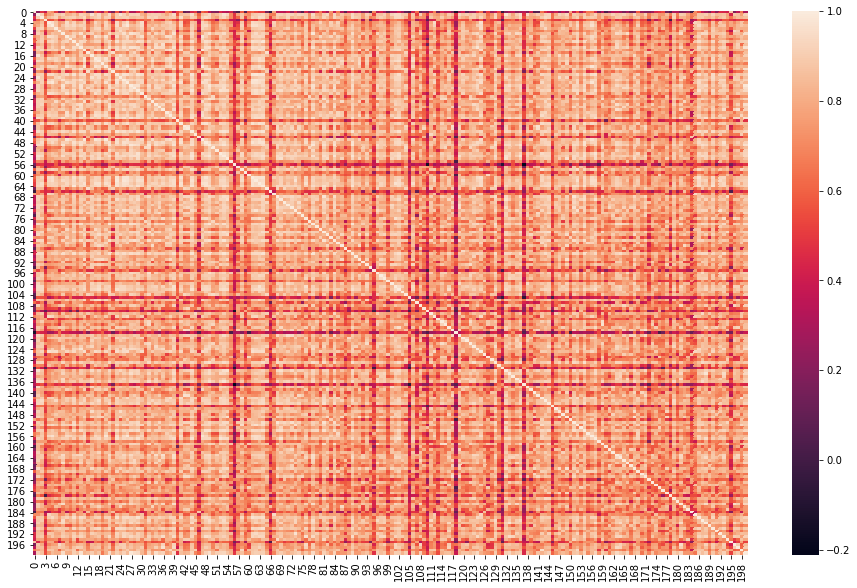

In [17]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

특정 상품과 비슷한 상품 추천

In [47]:
#상품 ID리스트 생성
prod_id = df.index
prod_id_list = list(prod_id)

In [48]:
#타겟 상품 인덱스
target_index = prod_id_list.index(2865723582)

In [55]:
#타겟 상품의 상관계수 리스트
target_corrs  = corr[target_index]
recommend_prod_list = list(prod_title[(target_corrs >= 0.9)])[:50]
head_target_corrs = target_corrs[target_corrs >= 0.9]

In [50]:
#추천 리스트 
recommend_prod_titles = prod_data[prod_data['prod_idx'].isin(recommend_prod_list)]['title']
recommend_prod_titles

0        [컬러푸드] 선착순20%할인쿠폰+해남 후기갑 꿀고구마 중상1kg 정품\n한입/특상/...
10758                         [강동상회] 국산 통참깨 100% 참기름 300ml
14780                 반건 대구노가리 앵치 20미내외 외 킹대구포/동전오족/청대구포 등
14963            [빠른배송] 선물용 / 식탁 / 도시락 / 반찬용 재래김 모음 [영신식품]
15563                      [찐수산대전] [삼다몰] 제주 옥돔 1kg 2kg 3kg
20395                            [레알감자] 프랑스산 감자펠렛+글루틴 Free
20897                        [머거본]견과류 양념 불닭볶음 아몬드 210g x3봉
23427                                       윌튼 바닐라오일 (2oz)
24133                          [우리가스토리] 씨없는 대추야자 500g＋500g
27950              [한결물산] 2020년 햅쌀 상등급 임금님표 이천쌀 해들미 4/10kg
30244                     [삼영푸드] 신선하고 맛있는 유황오리훈제(슬라이스) 1kg
Name: title, dtype: object

In [59]:
print('추천 품목')
for idx, title in enumerate(recommend_prod_titles) :
    print('Title : {}. \n corr : {}\n'.format(title, head_target_corrs[idx]))

추천 품목
Title : [컬러푸드] 선착순20%할인쿠폰+해남 후기갑 꿀고구마 중상1kg 정품
한입/특상/대 사이즈별 골라담기. 
 corr : 1.0

Title : [강동상회] 국산 통참깨 100% 참기름 300ml. 
 corr : 0.9095735914573366

Title : 반건 대구노가리 앵치 20미내외 외 킹대구포/동전오족/청대구포 등. 
 corr : 0.9035792239159949

Title : [빠른배송] 선물용 / 식탁 / 도시락 / 반찬용 재래김 모음 [영신식품]. 
 corr : 0.9688571208588036

Title : [찐수산대전] [삼다몰] 제주 옥돔 1kg 2kg 3kg. 
 corr : 0.973063141705893

Title : [레알감자] 프랑스산 감자펠렛+글루틴 Free. 
 corr : 0.9001822038961828

Title : [머거본]견과류 양념 불닭볶음 아몬드 210g x3봉. 
 corr : 0.910397139453678

Title : 윌튼 바닐라오일 (2oz). 
 corr : 0.9724223515933476

Title : [우리가스토리] 씨없는 대추야자 500g＋500g. 
 corr : 0.9237600655799048

Title : [한결물산] 2020년 햅쌀 상등급 임금님표 이천쌀 해들미 4/10kg. 
 corr : 0.9331565903509662

Title : [삼영푸드] 신선하고 맛있는 유황오리훈제(슬라이스) 1kg. 
 corr : 0.9736924180769975



개인 사용자 추천
index = user_id, column = prod_id

In [75]:
df2 = pd.DataFrame(df.values.T,index = list(df.columns), columns = list(df.index))

In [76]:
df2

,2865723582,512851998,760761146,212815213,3030712126,638703986,1428676362,1804864666,412462214,4125298018,...,2773057954,4244345722,3840159202,2323253942,3450032938,2764649526,3518409054,3173194022,4292984610,3344589718
101994422,5,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5016629,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298123,5,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
80235,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17873545,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73024842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5851257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41814697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40265865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df2.shape

(58322, 9834)

In [ ]:
#유저 수가 너무 많아서 더 줄여야함.
#잠재의미분석의 의미가있나 이래서는..

In [79]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(df2)
matrix.shape

(58322, 12)

In [80]:
corr = np.corrcoef(matrix)
corr2 = corr[:200, :200]

MemoryError: Unable to allocate 25.3 GiB for an array with shape (58322, 58322) and data type float64

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

In [ ]:
user_id = df2.index
user_id_list = list(user_id)

In [ ]:
#타겟 유저 인덱스
target_user_index = user_id_list.index(5016629)

In [ ]:
#타겟 유저의 상관계수 리스트
target_user_corrs  = corr[target_user_index]
recommend_user_list = list(prod_title[(target_user_corrs >= 0.9)])[:50]
head_target_corrs = target_corrs[target_user_corrs >= 0.9]

In [ ]:
#추천 리스트 
recommend_user_df = df2[df2['index'].isin(recommend_user_list)]
recommend_user_df

In [ ]:
print('추천 품목')
for idx, title in enumerate(recommend_prod_titles) :
    print('Title : {}. \n corr : {}\n'.format(title, head_target_corrs[idx]))